In [1]:
# first run the workflow to get the raw data for analysis.

In [3]:
import pandas as pd
from intervaltree import IntervalTree

In [4]:
# lets do cell pellets first - preferred table

expected_features_cell = [
    (399.1823, 33.4,  'M0_1'),
    (399.2184, 224.8, 'M0_2'),
    (371.1874, 257.2, 'M1'),
    (415.2134, 264.8, 'M2_1'),
    (415.2128, 224.5, 'M2_2'),
    (343.1562, 249.4, 'M3'),
    (387.1823, 35.4,  'M4_1'),
    (387.1824, 242.5, 'M4_2'),
    (413.1978, 34.6,  'M12'),
    (385.1667, 38.9,  'M14_1'),
    (385.1666, 65.8,  'M14_2'),
    (159.1490, 273.2, 'M20')
]

pft_cell = pd.read_csv("./cell_data/pref_for_analysis_Feature_table.tsv", sep="\t")
fft_cell = pd.read_csv("./cell_data/full_for_analysis_Feature_table.tsv", sep="\t")


In [5]:
ppm_mz_tol = 5
rt_tol = 10

pft_mz_tree = IntervalTree()
pft_rt_tree = IntervalTree()
for mz, rt, id in zip(pft_cell['mz'], pft_cell['rtime'], pft_cell['id_number']):
    mz_err = mz/1e6 * ppm_mz_tol
    pft_mz_tree.addi(mz-mz_err, mz+mz_err, id)
    pft_rt_tree.addi(rt-rt_tol, rt+rt_tol, id)

fft_mz_tree = IntervalTree()
fft_rt_tree = IntervalTree()
for mz, rt, id in zip(fft_cell['mz'], fft_cell['rtime'], fft_cell['id_number']):
    mz_err = mz/1e6 * ppm_mz_tol
    fft_mz_tree.addi(mz-mz_err, mz+mz_err, id)
    fft_rt_tree.addi(rt-rt_tol, rt+rt_tol, id)

In [7]:
print("Cell - preferred")
with open("matched_features_cell_preferred.csv", 'w+') as out_fh:
    print("Bowen ID", "Matching Features (cell, pref)", file=out_fh)
    for expected in expected_features_cell:
        exp_mz, exp_rt, id = expected
        matches_mz = set([x.data for x in pft_mz_tree.at(exp_mz)])
        matches_rt = set([x.data for x in pft_rt_tree.at(exp_rt)])
        true_matches = matches_mz.intersection(matches_rt)
        print(id, true_matches)
        print(id, "Found" if true_matches else "Not Found", file=out_fh)
print()
print("Cell - full")
with open("matched_features_cell_full.csv", 'w+') as out_fh:
    print("Bowen ID", "Matching Features (cell, full)", file=out_fh)
    for expected in expected_features_cell:
        exp_mz, exp_rt, id = expected
        matches_mz = set([x.data for x in fft_mz_tree.at(exp_mz)])
        matches_rt = set([x.data for x in fft_rt_tree.at(exp_rt)])
        true_matches = matches_mz.intersection(matches_rt)
        print(id, true_matches)
        print(id, "Found" if true_matches else "Not Found", file=out_fh)


Cell - preferred
M0_1 {'F3960', 'F3959'}
M0_2 set()
M1 set()
M2_1 set()
M2_2 set()
M3 {'F3700'}
M4_1 {'F3531'}
M4_2 {'F3536'}
M12 {'F4003'}
M14_1 set()
M14_2 set()
M20 {'F392'}

Cell - full
M0_1 {'F3960', 'F3959'}
M0_2 {'F3963'}
M1 {'F3711'}
M2_1 {'F4187'}
M2_2 set()
M3 {'F3700'}
M4_1 {'F3532', 'F3531'}
M4_2 {'F3536'}
M12 {'F4002', 'F4003', 'F4004'}
M14_1 {'F3409', 'F3410', 'F3408'}
M14_2 {'F3412'}
M20 {'F392'}


In [9]:
# Now lets do the media

expected_features_media = [
    (399.2190, 134.9, 'M0_1'),
    (399.2191, 224.7, 'M0_2'),
    (371.1879, 257.1, 'M1'),
    (415.2140, 197.7, 'M2_1'),
    (415.2141, 264.8, 'M2_2'),
    (413.1983, 34.5,  'M12'),
    (385.1671, 39.0,  'M14'),
    (344.1407, 35.1,  'M20')
]

pft_media = pd.read_csv("./media_data/pref_for_analysis_Feature_table.tsv", sep="\t")
fft_media = pd.read_csv("./media_data/full_for_analysis_Feature_table.tsv", sep="\t")

In [10]:

pft_mz_tree = IntervalTree()
pft_rt_tree = IntervalTree()
for mz, rt, id in zip(pft_media['mz'], pft_media['rtime'], pft_media['id_number']):
    mz_err = mz/1e6 * ppm_mz_tol
    pft_mz_tree.addi(mz-mz_err, mz+mz_err, id)
    pft_rt_tree.addi(rt-rt_tol, rt+rt_tol, id)

fft_mz_tree = IntervalTree()
fft_rt_tree = IntervalTree()
for mz, rt, id in zip(fft_media['mz'], fft_media['rtime'], fft_media['id_number']):
    mz_err = mz/1e6 * ppm_mz_tol
    fft_mz_tree.addi(mz-mz_err, mz+mz_err, id)
    fft_rt_tree.addi(rt-rt_tol, rt+rt_tol, id)

In [11]:
print("Media - preferred")
with open("matched_features_media_preferred.csv", 'w+') as out_fh:
    print("Bowen ID", "Matching Features (media, pref)", file=out_fh)
    for expected in expected_features_media:
        exp_mz, exp_rt, id = expected
        matches_mz = set([x.data for x in pft_mz_tree.at(exp_mz)])
        matches_rt = set([x.data for x in pft_rt_tree.at(exp_rt)])
        true_matches = matches_mz.intersection(matches_rt)
        print(id, true_matches)
        print(id, "Found" if true_matches else "Not Found", file=out_fh)
print()

print("Media - full")
with open("matched_features_media_full.csv", 'w+') as out_fh:
    print("Bowen ID", "Matching Features (media, full)", file=out_fh)
    for expected in expected_features_media:
        exp_mz, exp_rt, id = expected
        matches_mz = set([x.data for x in fft_mz_tree.at(exp_mz)])
        matches_rt = set([x.data for x in fft_rt_tree.at(exp_rt)])
        true_matches = matches_mz.intersection(matches_rt)
        print(id, true_matches)
        print(id, "Found" if true_matches else "Not Found", file=out_fh)


Media - preferred
M0_1 {'F4052'}
M0_2 {'F4053'}
M1 set()
M2_1 {'F4434'}
M2_2 {'F4435'}
M12 {'F4299'}
M14 set()
M20 {'F3597', 'F3596'}

Media - full
M0_1 {'F4052'}
M0_2 {'F4053'}
M1 {'F4349'}
M2_1 {'F4434'}
M2_2 {'F4435'}
M12 {'F4299', 'F4298', 'F4300'}
M14 {'F3748'}
M20 {'F3597', 'F3596'}


In [6]:
# now lets find features associated with drug treatment

metadata = pd.read_csv("./s_MTBLS2746.txt", sep="\t")
print(metadata.head)

<bound method NDFrame.head of                 Source Name Characteristics[Organism] Term Source REF  \
0            CM__QC_media_1              Homo sapiens       NCBITAXON   
1            CM__QC_media_2              Homo sapiens       NCBITAXON   
2            CM__QC_media_3              Homo sapiens       NCBITAXON   
3            CM__QC_media_4              Homo sapiens       NCBITAXON   
4            CM__QC_media_5              Homo sapiens       NCBITAXON   
..                      ...                       ...             ...   
351                HP__QC13              Homo sapiens       NCBITAXON   
352       HP__ramipril_MI-T              Homo sapiens       NCBITAXON   
353  HP__ramipril_MI-T_MSMS              Homo sapiens       NCBITAXON   
354                HP__QC14              Homo sapiens       NCBITAXON   
355   HP__extract_blank_end                     blank             NaN   

                             Term Accession Number  \
0    http://purl.obolibrary.org/obo/NCB

In [7]:
names = [z for z in metadata["Source Name"]]
treatments = [z for z in metadata["Factor Value[Treatment]"]]

lookup = dict(zip(names, treatments))

sunitinib, control = [], []
for x in pft_cell.columns:
    if "CM__" + x in lookup:
        if lookup["CM__" + x] == 'experimental condition \'control\'':
            control.append(x)
        else:
            sunitinib.append(x)

print(sunitinib)

['AZ10', 'AZ11', 'AZ12', 'AZ16', 'AZ18', 'AZ4', 'AZ5', 'AZ6']


/var/folders/pz/1h09fp594z13_f873f8p_w20vw6015/T/ipykernel_3980/19478948.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = ttest_ind(s_vals, c_vals, equal_var=False)
/var/folders/pz/1h09fp594z13_f873f8p_w20vw6015/T/ipykernel_3980/19478948.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = ttest_ind(s_vals, c_vals, equal_var=False)
/var/folders/pz/1h09fp594z13_f873f8p_w20vw6015/T/ipykernel_3980/19478948.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = ttest_ind(s_vals, c_vals, equal_var=False)
/var/folders/pz/1h09fp594z13_f873f8p_w20vw6015/T/ipykernel_3980/19478948.py:10: RuntimeWarn

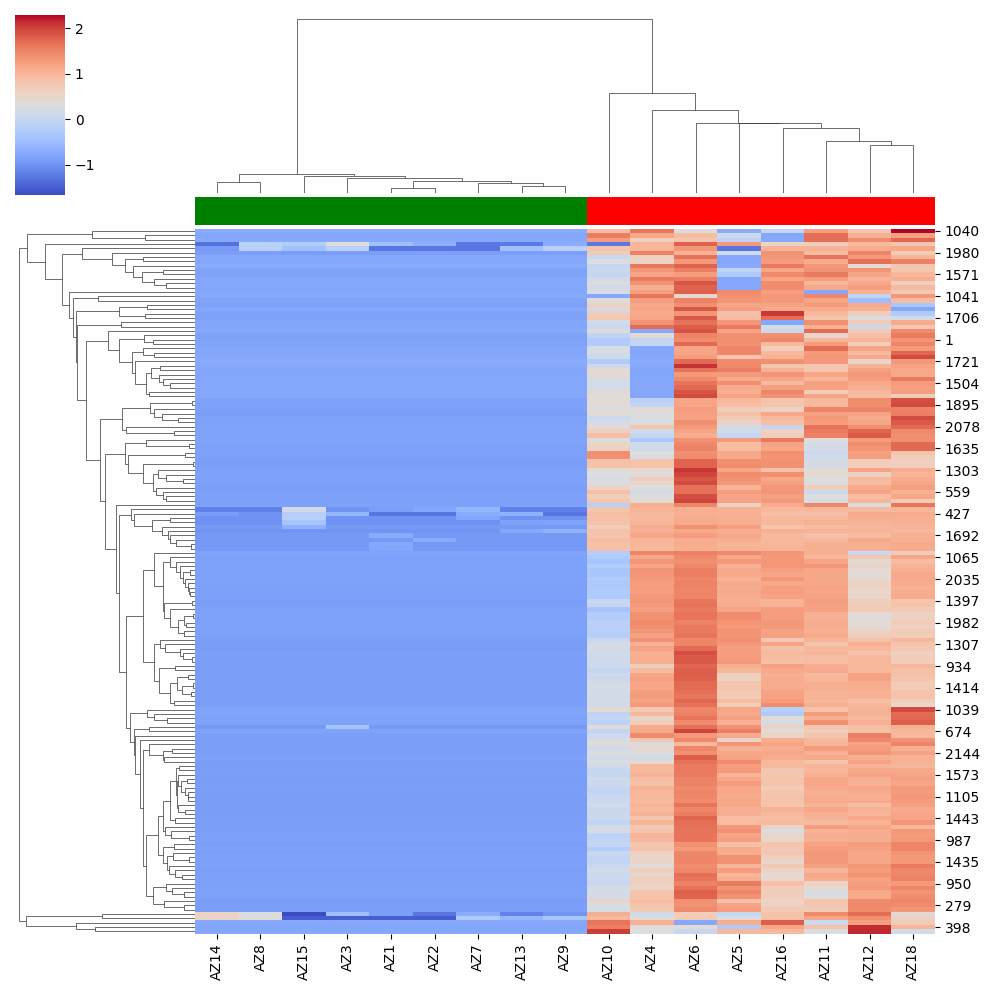

In [8]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import fdrcorrection
import matplotlib.pyplot as plt
import seaborn as sns

raw_p_vals = []
for feature in pft_cell['id_number']:
    s_vals = pft_cell[pft_cell['id_number'] == feature][sunitinib].values[0]
    c_vals = pft_cell[pft_cell['id_number'] == feature][control].values[0]
    t, p = ttest_ind(s_vals, c_vals, equal_var=False)
    raw_p_vals.append(p)
kept, corr_p_vals = fdrcorrection(raw_p_vals)
sig_feature = [feature for feature, kept in zip(pft_cell['id_number'], kept) if kept]
for_plot = pft_cell[pft_cell['id_number'].isin(sig_feature)][sunitinib + control]
sns.clustermap(for_plot, cmap='coolwarm', col_colors=['r' for _ in sunitinib] + ['g' for _ in control], z_score=0)
plt.show()

for_plot["p_value(corr)"] = [p for p, kept in zip(corr_p_vals, kept) if kept]
for_plot["p_value(raw)"] = [p for p, kept in zip(raw_p_vals, kept) if kept]
for_plot.to_csv("significant_features_bowen2023_cell_preferred_for_analysis.tsv", sep="\t", index=0)

pft_cell["p_value(corr)"] = corr_p_vals
pft_cell["p_value(raw)"] = raw_p_vals
pft_cell.to_csv("all_features_bowen2023_cell_preferred_for_analysis.tsv", sep="\t", index=0)